# **Customer Interest Prediction for Hyper Artificial Intelligence Fund**

## Overview

Head of Sales at Hyper Big Bank wants to start marketing of `Hyper Artificial Intelligence Fund`, new fund products for sales to the clients of Hyper Big Bank. Marketing is through one-on-one phone calls with individual customers of Hyper Big Bank whereby, the end of each phone call each customer is asked if they would or would not have an interest in the product and the salesperson from Hyper Big Bank will then assign each customer into four categories based on their interest.

The goal of the project is, to develops a model that aims to assist the Head of Sales in marketing the fund by predicting customer interest (categorized into four classes) during one-on-one phone calls. The model will help to prioritize customer calls and improve marketing efficiency.

The `PACE` framework has been used to structure and complete this project.
- Plan
- Analyze
- Construct
- Execute


----

![](img/pace_plan.png)

The dataset comprises customer information collected from 3,000 customers (though only 2,000 rows are provided for model development). Each row represents a single customer, and the data includes anonymized customer features (labeled FEAT_0 to FEAT_17). An Independent Model Validation Team has retained the remaining 1,000 rows for independent testing of the developed model.

- Familiarize with the dataset
- Investigate and underastand the data
- Prepare the data for analysis


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for models
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# for xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

# for scaling
from sklearn.preprocessing import StandardScaler

# for VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for metrics
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, classification_report

# for saving models
import pickle

# random state used in this notebook
random_state = 42


# data file path
data_file = 'dataset/sales_calls.csv'

# load data into a dataframe
df0 = pd.read_csv(data_file)


### Underastand the dataset

In [ ]:
# size of the data
print(df0.shape)

# read the first 5 entries
df0.head()

(2000, 19)


,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,FEAT_12,FEAT_13,FEAT_14,FEAT_15,FEAT_16,FEAT_17,CATEGORY
0,0.04,JOB_B,2,1,-0.04,8,9,0.68,0.84,6.0,5,0.9,0.3,-0.3,8,CITY_A,0.21,0.14,1
1,0.58,JOB_B,1,3,-0.58,7,10,0.14,0.04,4.0,4,0.7,0.0,0.0,1,CITY_A,0.01,0.13,1
2,0.57,JOB_B,0,4,-0.57,7,1,0.25,0.15,10.0,1,0.0,0.8,-0.8,5,CITY_A,0.01,0.94,0
3,0.02,JOB_A,1,2,-0.02,3,2,0.84,0.31,7.0,6,0.0,0.4,-0.4,1,CITY_A,0.14,0.50,1
4,0.01,JOB_A,1,4,-0.01,0,0,0.04,0.71,7.0,4,0.7,0.3,-0.3,3,CITY_A,0.55,0.18,0


There are 2,000 rows and 19 different columns (features) representing customer information. Column `CATEGORY` is the target variable for the project.

In [ ]:
# basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEAT_0    2000 non-null   float64
 1   FEAT_1    2000 non-null   object 
 2   FEAT_2    2000 non-null   int64  
 3   FEAT_3    2000 non-null   int64  
 4   FEAT_4    2000 non-null   float64
 5   FEAT_5    2000 non-null   int64  
 6   FEAT_6    2000 non-null   int64  
 7   FEAT_7    2000 non-null   float64
 8   FEAT_8    2000 non-null   float64
 9   FEAT_9    1816 non-null   float64
 10  FEAT_10   2000 non-null   int64  
 11  FEAT_11   2000 non-null   float64
 12  FEAT_12   2000 non-null   float64
 13  FEAT_13   2000 non-null   float64
 14  FEAT_14   2000 non-null   int64  
 15  FEAT_15   2000 non-null   object 
 16  FEAT_16   2000 non-null   float64
 17  FEAT_17   2000 non-null   float64
 18  CATEGORY  2000 non-null   int64  
dtypes: float64(10), int64(7), object(2)
memory usage: 297.0+ KB


Of the 19 features, only 2 are of datatype object and there are no NULL values in the whole dataset except for column `FEAT_9` which has 1816 filled entries of the 2,000.

**Features breakdown**
- 10 Features- float (Numeric)
- 7  Features- int (Numeric)
- 2  Features- Objects (Categorical)

In [ ]:
# descriptive stats about the data
df0.describe()

,FEAT_0,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,FEAT_12,FEAT_13,FEAT_14,FEAT_16,FEAT_17,CATEGORY
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,1816.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000
mean,0.333960,1.005000,2.992000,-0.333960,40.252000,5.082500,0.33655,0.333735,4.997797,5.035000,0.495300,0.501100,-0.501100,4.901500,0.33902,0.328260,1.23350
std,0.303743,0.696576,1.216008,0.303743,184.200946,3.167919,0.30174,0.298583,3.216006,3.129964,0.287922,0.293891,0.293891,3.125009,0.30083,0.299766,1.02494
min,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.00000,0.000000,0.00000
25%,0.050000,1.000000,2.000000,-0.580000,2.000000,2.000000,0.06000,0.060000,2.000000,2.000000,0.300000,0.200000,-0.700000,2.000000,0.07000,0.060000,0.00000
50%,0.250000,1.000000,3.000000,-0.250000,5.000000,5.000000,0.25000,0.260000,5.000000,5.000000,0.500000,0.500000,-0.500000,5.000000,0.26000,0.240000,1.00000
75%,0.580000,1.000000,4.000000,-0.050000,8.000000,8.000000,0.57000,0.560000,8.000000,8.000000,0.700000,0.700000,-0.200000,8.000000,0.57000,0.542500,2.00000
max,1.000000,2.000000,5.000000,0.000000,1000.000000,10.000000,1.00000,1.000000,10.000000,10.000000,1.000000,1.000000,0.000000,10.000000,1.00000,1.000000,3.00000


### Check for duplicates

In [ ]:
# total duplicate value
df0.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset.

### Check missing values

In [ ]:
# total null value
df0.isna().sum()

FEAT_0        0
FEAT_1        0
FEAT_2        0
FEAT_3        0
FEAT_4        0
FEAT_5        0
FEAT_6        0
FEAT_7        0
FEAT_8        0
FEAT_9      184
FEAT_10       0
FEAT_11       0
FEAT_12       0
FEAT_13       0
FEAT_14       0
FEAT_15       0
FEAT_16       0
FEAT_17       0
CATEGORY      0
dtype: int64

In [ ]:
missing_percentage = (df0['FEAT_9'].isna().sum() / df0.shape[0])*100
print(missing_percentage, '% of the data in FEAT_9 is missing values.')

9.2 % of the data in FEAT_9 is missing values.


There 184 missing values and all belong to one feature `FEAT_9`. That is 9.2 % of the data in FEAT_9 are missing values.

In [ ]:
# dataset with the NULL values
df0[df0['FEAT_9'].isna()]

,FEAT_0,FEAT_1,FEAT_2,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,FEAT_12,FEAT_13,FEAT_14,FEAT_15,FEAT_16,FEAT_17,CATEGORY
6,0.04,JOB_A,2,4,-0.04,9,2,0.10,0.09,NaN,9,0.0,0.1,-0.1,5,CITY_A,0.82,0.03,3
14,0.70,JOB_A,1,4,-0.70,4,6,0.07,1.00,NaN,5,0.3,0.3,-0.3,9,CITY_A,0.30,0.83,3
20,0.00,JOB_D,0,2,0.00,6,8,0.39,0.74,NaN,0,0.8,0.2,-0.2,0,CITY_A,0.01,0.24,0
39,0.15,JOB_D,2,4,-0.15,4,0,0.15,0.14,NaN,4,0.7,0.8,-0.8,9,CITY_A,0.05,0.16,0
54,0.14,JOB_A,1,2,-0.14,6,10,0.30,0.01,NaN,9,0.6,0.7,-0.7,4,CITY_A,0.01,0.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,0.01,JOB_D,1,1,-0.01,3,8,0.96,0.36,NaN,5,0.9,0.4,-0.4,7,CITY_B,0.10,0.51,0
1969,0.34,JOB_B,0,3,-0.34,5,1,0.03,0.00,NaN,2,0.0,0.4,-0.4,9,CITY_B,0.61,0.51,0
1983,0.44,JOB_C,2,3,-0.44,10,0,0.01,0.39,NaN,7,0.1,0.7,-0.7,10,CITY_B,0.63,0.00,3
1985,0.80,JOB_C,1,3,-0.80,10,4,0.59,0.45,NaN,5,0.8,0.5,-0.5,3,CITY_B,0.74,0.02,1


There are not specific trend in the missing values since this customers are spread across the dataset in terms of cities, job and categories.

### Check distribution of the data

#### **Distribution of target variable**

In [ ]:
# distribution of target variable
df0['CATEGORY'].value_counts()

CATEGORY
1    622
0    594
2    507
3    277
Name: count, dtype: int64

- 594 customers under Category 0 - Do not call again.
- 622 customers under Category 1 - Low priority to call client again.
- 507 customers under Category 2 - Medium priority to call client again. 
- 277 customers under Category 3 - High priority to call client again.


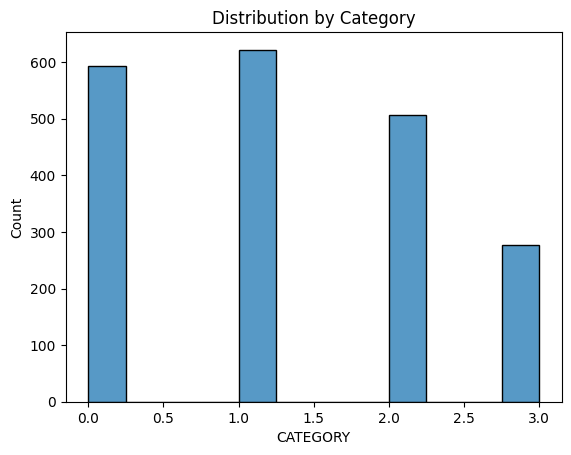

In [ ]:
# histogram plot of target variable
sns.histplot(df0['CATEGORY'])
plt.title('Distribution by Category')
plt.show()

There is a fair distribution across Category 0,1 and 2. There are fewer customers that belonged to category 3 in the dataset

#### **Distribution of customers by job type**

In [ ]:
# distribution in jobs
df0['FEAT_1'].value_counts()

FEAT_1
JOB_A    1011
JOB_B     387
JOB_C     331
JOB_D     271
Name: count, dtype: int64

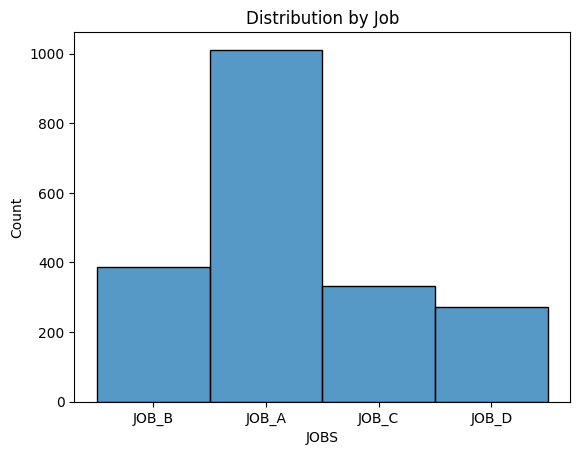

In [ ]:
# histogram plot of target variable
sns.histplot(df0['FEAT_1'])
plt.xlabel('JOBS')
plt.title('Distribution by Job')
plt.show()

In [ ]:
# distribution in jobs in Percentage
(df0['FEAT_1'].value_counts()/df0.shape[0])*100

FEAT_1
JOB_A    50.55
JOB_B    19.35
JOB_C    16.55
JOB_D    13.55
Name: count, dtype: float64

There are a lot of JOB_A customers (just over 50% of the whole dataset), while the other three (JOB B,C,D) account for about the other 50% of the data, with a difference of rougly 3% between those JOBs.

#### **Distribution of customers by city**

In [ ]:
df0['FEAT_15'].value_counts()

FEAT_15
CITY_A    1000
CITY_B    1000
Name: count, dtype: int64

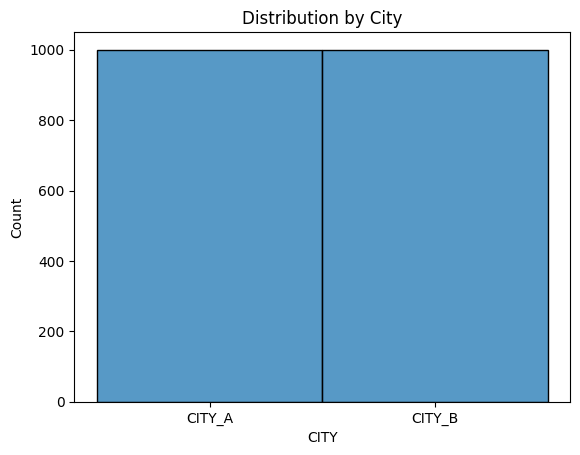

In [ ]:
# histogram plot of target variable
sns.histplot(df0['FEAT_15'])
plt.xlabel('CITY')
plt.title('Distribution by City')
plt.show()

There is a uniform distribution of customers based on city. 50% for CITY_A (1,000) and 50% for CITY_B (1,000).

![](img/pace_analyze.png)

- Perform EDA
- Prepare data for ML models

### Handle missing values

In [ ]:
# missing values in FEAT_9
print('Total missing values: ', df0['FEAT_9'].isna().sum())
df0['FEAT_9'].value_counts()

Total missing values:  184


FEAT_9
7.0     184
10.0    179
0.0     174
1.0     172
4.0     171
9.0     169
3.0     165
2.0     160
6.0     152
8.0     148
5.0     142
Name: count, dtype: int64

FEAT_9 (feature with all the missing values) has 11 groups running for 0 to 10. It has 184 missing values which is 9.2% of the data. Dropping these customers will meaning getting rid of 9.2% of the dataset. Dropping the whole column is also an option, but there is still little information to indicate going for that option. The best option as of this stage would be to impute using the `mean` or `median`.

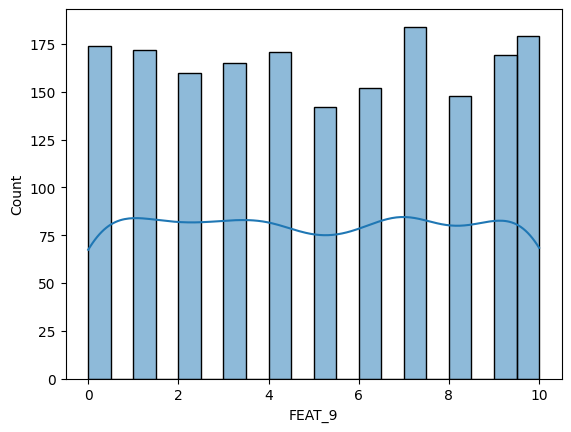

In [ ]:
# check distribution of the features
sns.histplot(df0['FEAT_9'], bins=20, kde=True);

Distribution of FEAT_9 is not skewed.

In [ ]:
# FEAT_9 mean and median
print('MEAN: ',df0['FEAT_9'].mean())
print('MEDIAN: ', df0['FEAT_9'].median())

MEAN:  4.997797356828194
MEDIAN:  5.0


In [ ]:
# Fill NULL values with 5
df0['FEAT_9'] = df0['FEAT_9'].fillna(5)

In [ ]:
df0['FEAT_9'].value_counts()

FEAT_9
5.0     326
7.0     184
10.0    179
0.0     174
1.0     172
4.0     171
9.0     169
3.0     165
2.0     160
6.0     152
8.0     148
Name: count, dtype: int64

### Check for Outliers

Plotting boxplots for all the features to identify outliers.

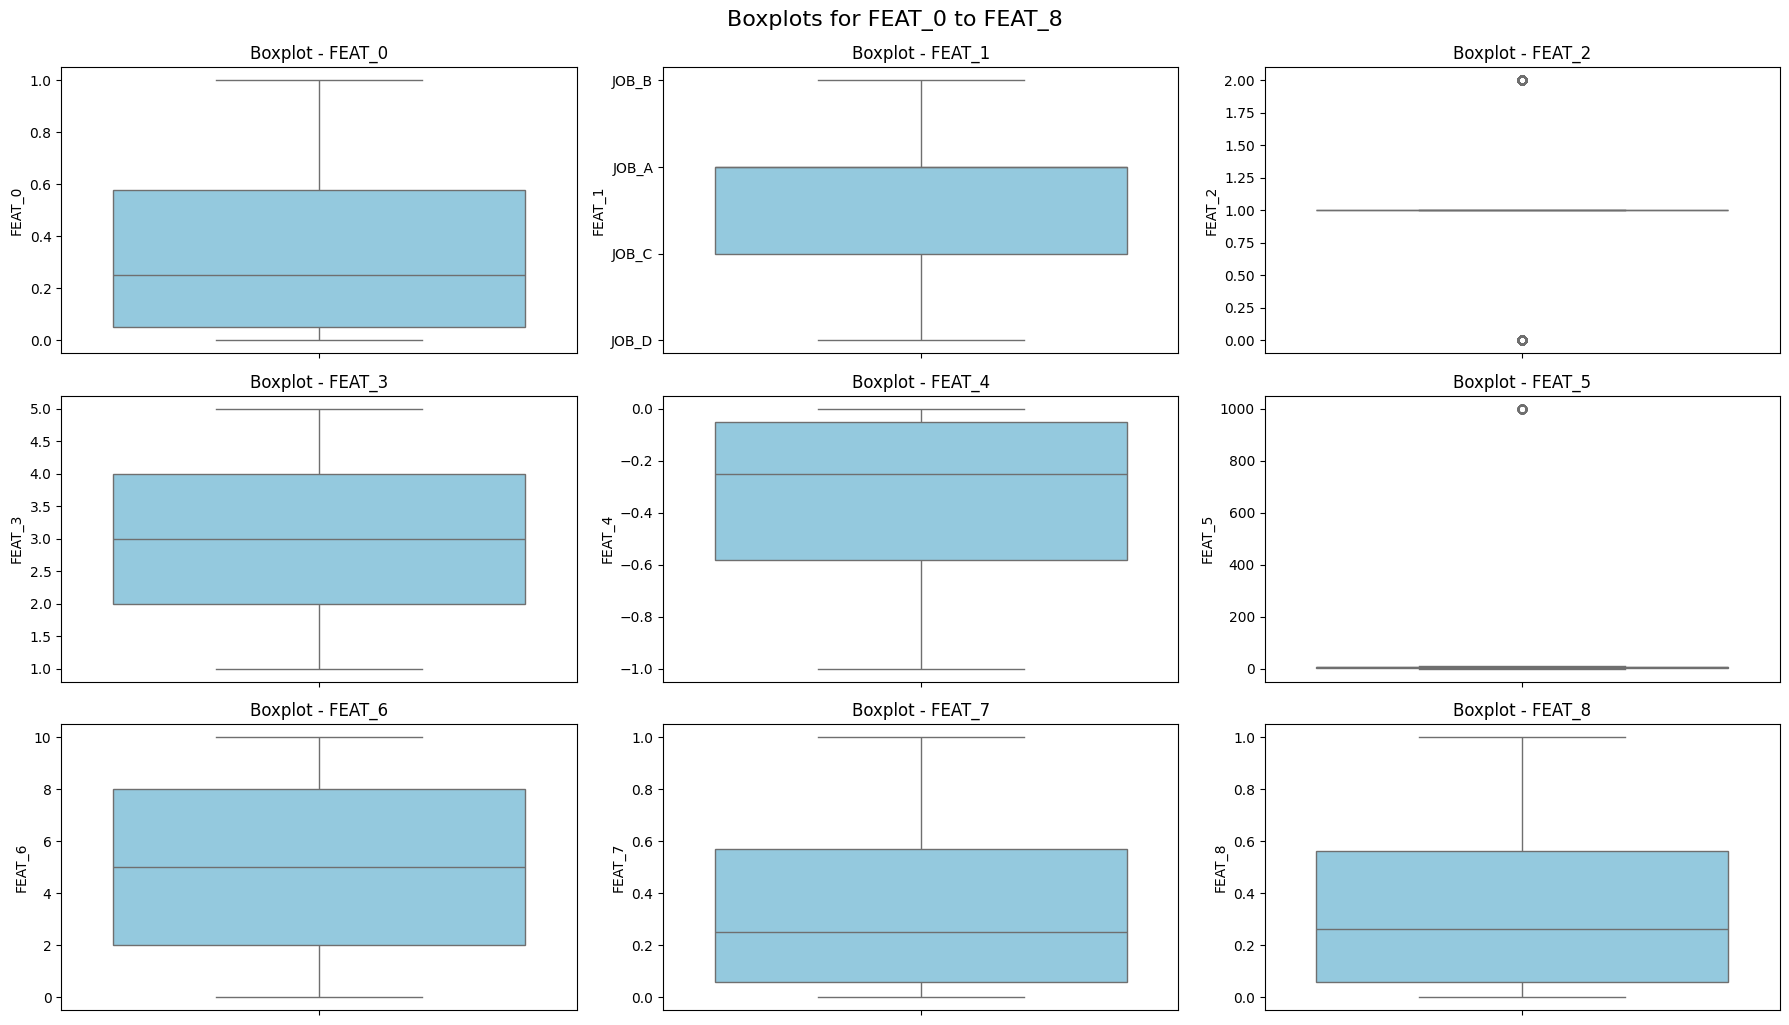

In [ ]:
# plot boxplot for FEAT_0 - FEAT_8
plt.figure(figsize=(18, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df0[f'FEAT_{i}'], color='skyblue')
    plt.title(f'Boxplot - FEAT_{i}')
    plt.tight_layout()

plt.suptitle("Boxplots for FEAT_0 to FEAT_8", fontsize=16, y=1.02)
plt.show()


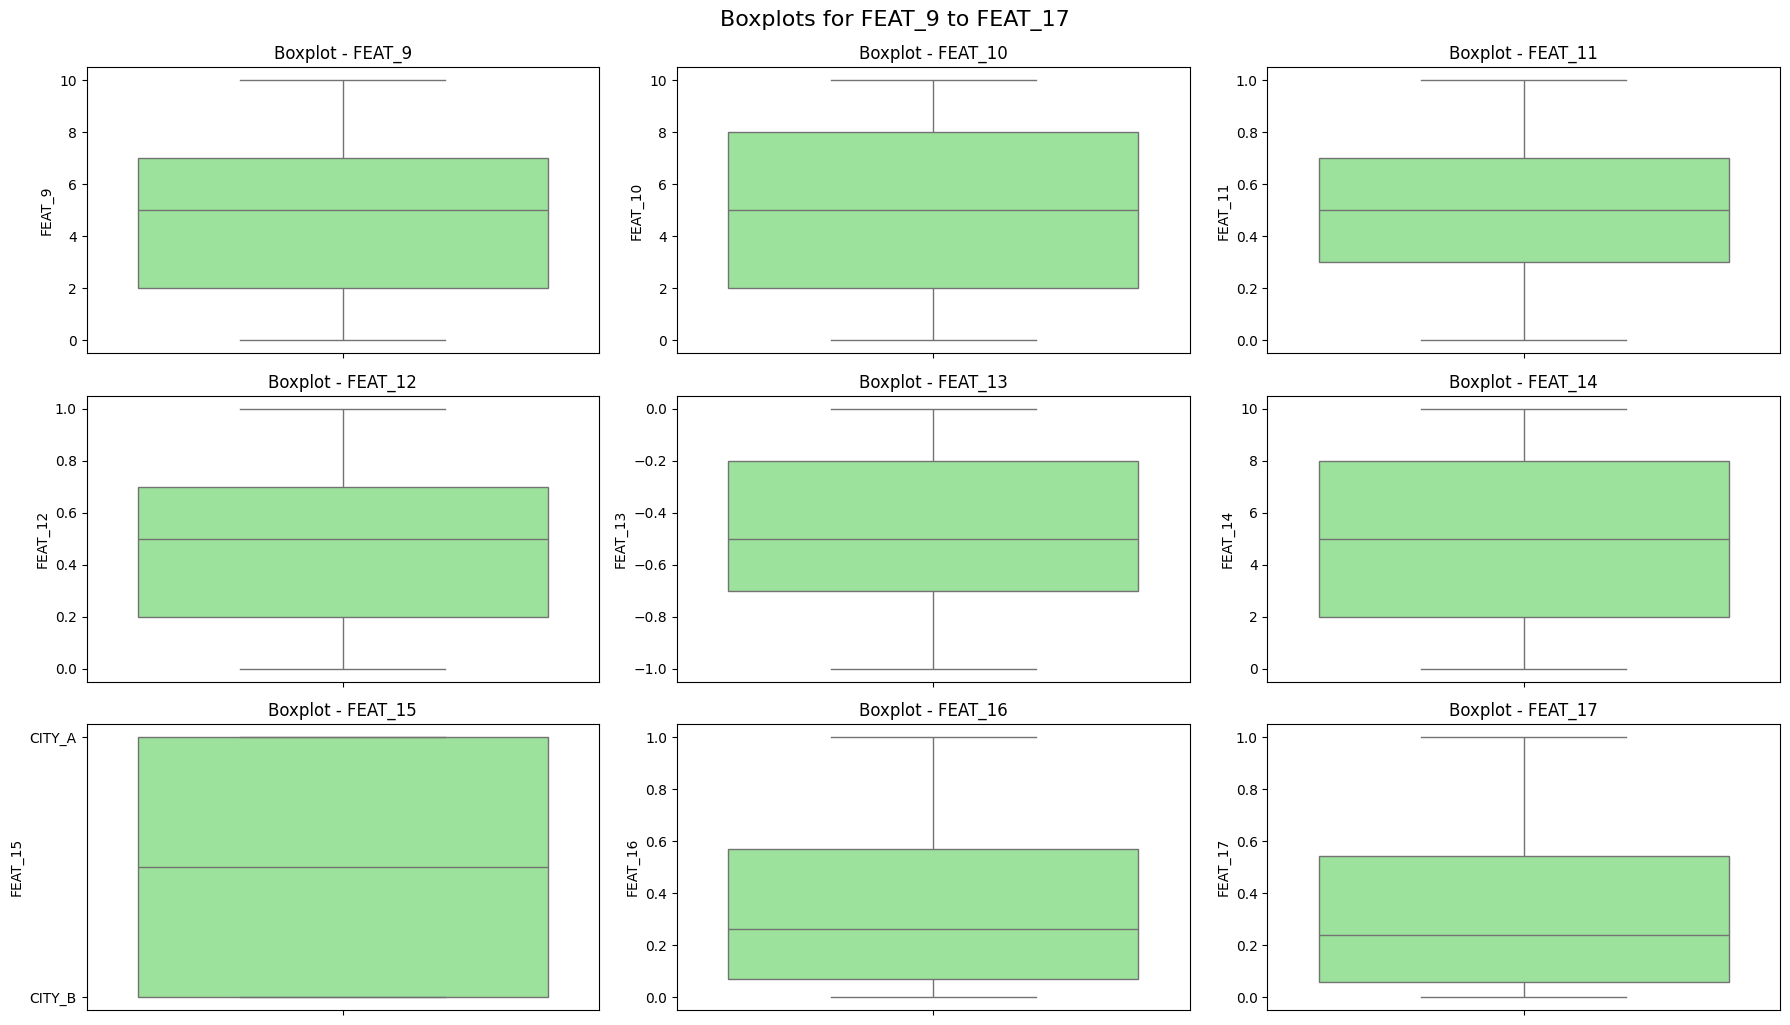

In [ ]:
# plot boxplot for FEAT_9 - FEAT_17
plt.figure(figsize=(18, 10))
for i in range(9, 18):
    plt.subplot(3, 3, i - 8)
    sns.boxplot(y=df0[f'FEAT_{i}'], color='lightgreen')
    plt.title(f'Boxplot - FEAT_{i}')
    plt.tight_layout()

plt.suptitle("Boxplots for FEAT_9 to FEAT_17", fontsize=16, y=1.02)
plt.show()


Of all the features, only 2 indicate the presence of outliers in them.
- FEAT_2
- FEAT_5

#### **Outliers - FEAT_2**

In [ ]:
# check values in FEAT_2
df0['FEAT_2'].value_counts()

FEAT_2
1    1030
2     490
0     480
Name: count, dtype: int64

The boxplot indicates that of the three groups (0,1,2) in FEAT_2, groups 0 and 2 are treated as outliers. It looks like FEAT_2 is more of categorical, not continuous with 3 distinct values (0,1,2). Some ML models like the Logistic Regression which is a must for the project is sensitive to outliers and they should be handled.

In [ ]:
# check values in FEAT_2 in percentage %
df0['FEAT_2'].value_counts(normalize=True)

FEAT_2
1    0.515
2    0.245
0    0.240
Name: proportion, dtype: float64

By removing the outliers (getting rid of 0 and 2) would mean removing about 45% of the data. A good option is to just treat FEAT_2 as a categorical feature by converting it using one-hot encoding, which is done down the line.

#### **Outliers - FEAT_5**

In [ ]:
# check values in FEAT_5
df0['FEAT_5'].value_counts()

FEAT_5
0       189
1       185
10      178
7       178
2       176
3       176
5       174
6       169
9       169
4       168
8       167
1000     71
Name: count, dtype: int64

As per the boxplot of outliers for FEAT_5, customer that belong to group `1000` (71 customers) are treated as outliers.

- Values from 0 to 10: Count per value is roughly between 160's to 180's, fairly balanced

- Value 1000: Count = 71, which clearly stands out

So 1000 is an outlier, and probably not in the same scale or meaning as the rest. It might represent a special case like missing, error, or extreme behavior.



### Correlations between variables
A correlation heatmap to find out how different variables are related to one another.

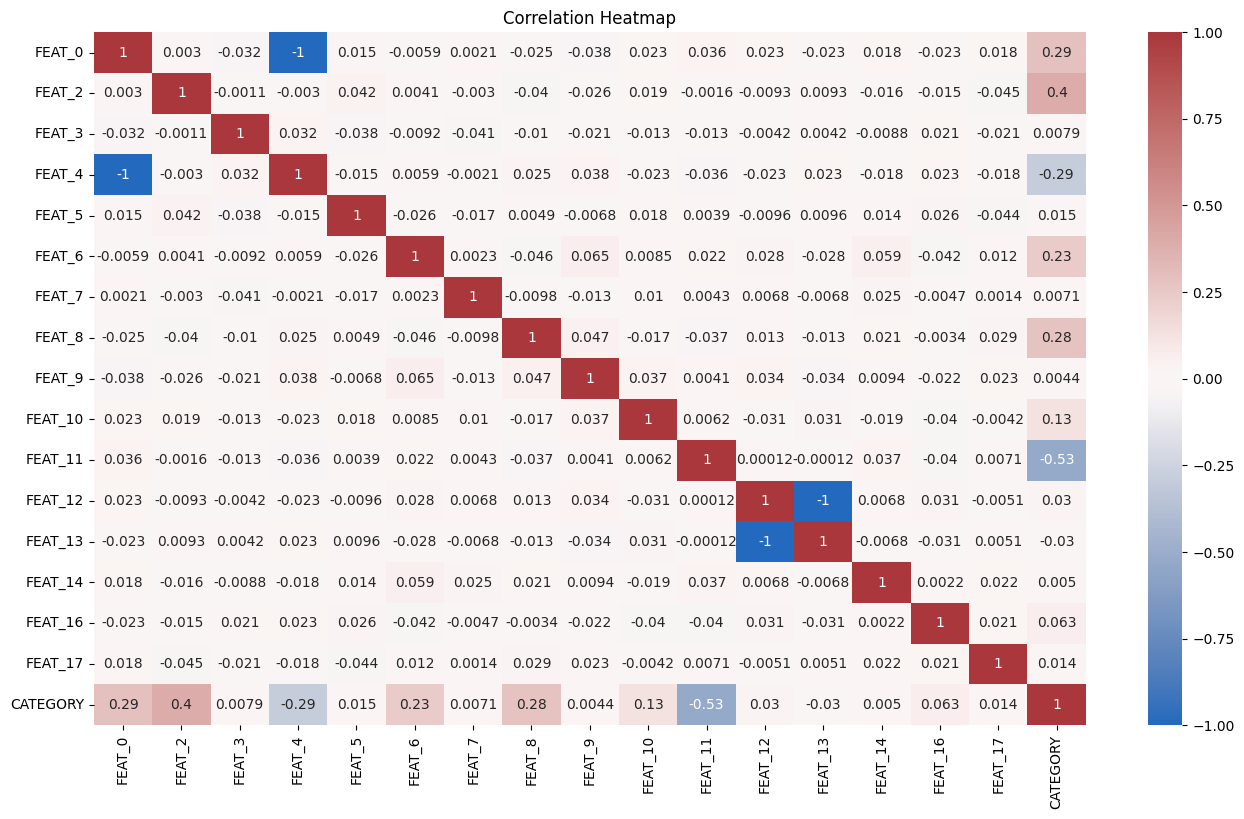

In [ ]:
# Plot the correlation heatmap

plt.figure(figsize=(16, 9))
sns.heatmap(df0.corr(numeric_only=True), annot=True, cmap="vlag")
plt.title('Correlation Heatmap');

**Observations from the Correlation Heatmap:**

`Target Variable: CATEGORY`

*Positive correlation*
- FEAT_2(strongest positive correlation), FEAT_6, FEAT_8, FEAT_0

*Negative correlation*
- FEAT_11 (strongest negative correlation), FEAT_4

*Very low correlation*
- FEAT_3, FEAT_7, FEAT_9, FEAT_14, FEAT_17 (around +-0.01 or less)

`Multicollinearity`

*Perfect inverse correlation* - mirror of each other
- FEAT_0 vs FEAT_4 (−1)
- FEAT_12 vs FEAT_ 13 (-1)

### Variance Inflation Factor (VIF)
While initial correlation analysis provides a preliminary understanding of feature relationships, it is overly simplistic for addressing multicollinearity. To thoroughly examine multicollinearity and its potential impact on model stability and interpretability, Variance Inflation Factor (VIF) analysis was performed.

In [ ]:
# Explore multicollinearity with VIF
import warnings
# copy and remove the target variable
vif_data = df0.copy()
vif_data = vif_data.drop(columns=['CATEGORY', 'FEAT_2'])

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    # VIF is for numerical features
    X_numeric = vif_data.select_dtypes(include=np.number)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_numeric.columns
    vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i)
                    for i in range(len(X_numeric.columns))]
print(vif_data.sort_values(by="VIF", ascending=False))



    feature       VIF
0    FEAT_0       inf
2    FEAT_4       inf
10  FEAT_12       inf
11  FEAT_13       inf
1    FEAT_3  5.376639
9   FEAT_11  3.595570
7    FEAT_9  3.437925
4    FEAT_6  3.361913
12  FEAT_14  3.273081
8   FEAT_10  3.265998
13  FEAT_16  2.168396
6    FEAT_8  2.158758
5    FEAT_7  2.142829
14  FEAT_17  2.135412
3    FEAT_5  1.050309


FEAT_0, FEAT_4, FEAT_12, and FEAT_13 all have infinite VIF values, indicating perfect multicollinearity. It means that one of these features can be perfectly predicted by a linear combination of the others and that they conveying exactly the same information.

FEAT_3 (5.37) has VIF values slightly above the common threshold of 5. While not infinite, these values suggest a strong degree of multicollinearity.

### Principal Component Analysis (PCA)
To assess the dimensionality of the feature space and explore multicollinearity, PCA was performed after dropping the target variable and categorical features. 


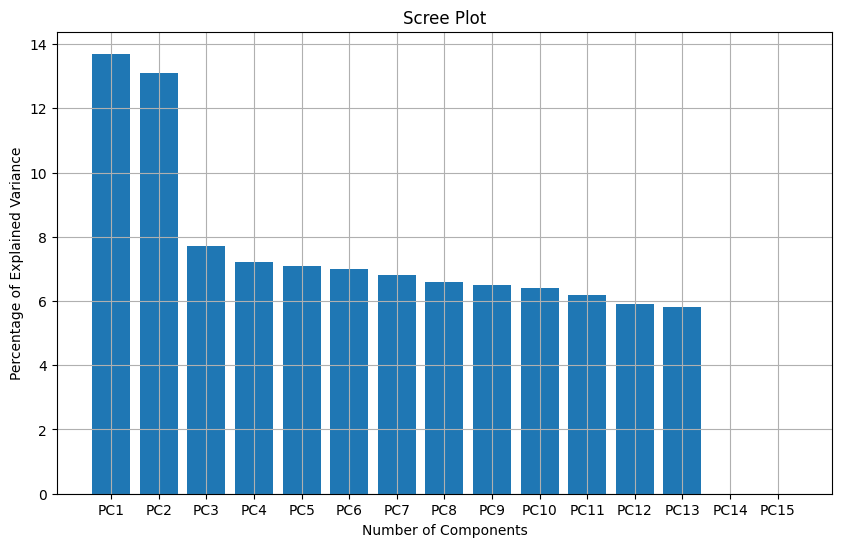

In [ ]:
# copy and remove the target variable and categorical features
pca_data = df0.copy()
pca_data = pca_data.drop(columns=['CATEGORY', 'FEAT_1', 'FEAT_2', 'FEAT_15'])

# scaling the data
pca_scaled = StandardScaler().fit_transform(pca_data)

# fit and transform PCA
pca = PCA()
pca.fit(pca_scaled)
pca_data = pca.transform(pca_scaled)

# explained_variance_ratio_
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]

# aplot the  explained_variance_ratio 
plt.figure(figsize=(10, 6))
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()


The scree plot shows that the first two components explain a combined ~27% of the variance, while the first 8–10 components each contribute more than 6%.

Although no sharp elbow is observed, the gradual decline suggests that a reduced set of ~8 components may be sufficient for dimensionality reduction without significant loss of information.

For interpretability, the original features were retained for modeling, but PCA findings support the use of transformation if needed for regularization or visualization.

----

![](img/pace_construct.png)
- Determine which models are most appropriate
- Construct the model
- Evaluate model results

### Determine appropriate Models

This is a classification problem since target variable `CATEGORY` is categorical.
Logistic Regression model (a must for the project), Support Vector Machine (SVM) and Tree-based Machine Learning models are good in solving such problems.

### Logistic Regression Model

Encode the categorical variables as needed.

In [ ]:
# encode using pandas get_dummies()
df_encd = pd.get_dummies(df0, columns=['FEAT_1','FEAT_2', 'FEAT_15'])
df_encd.head()

,FEAT_0,FEAT_3,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_9,FEAT_10,FEAT_11,...,CATEGORY,FEAT_1_JOB_A,FEAT_1_JOB_B,FEAT_1_JOB_C,FEAT_1_JOB_D,FEAT_2_0,FEAT_2_1,FEAT_2_2,FEAT_15_CITY_A,FEAT_15_CITY_B
0,0.04,1,-0.04,8,9,0.68,0.84,6.0,5,0.9,...,1,False,True,False,False,False,False,True,True,False
1,0.58,3,-0.58,7,10,0.14,0.04,4.0,4,0.7,...,1,False,True,False,False,False,True,False,True,False
2,0.57,4,-0.57,7,1,0.25,0.15,10.0,1,0.0,...,0,False,True,False,False,True,False,False,True,False
3,0.02,2,-0.02,3,2,0.84,0.31,7.0,6,0.0,...,1,True,False,False,False,False,True,False,True,False
4,0.01,4,-0.01,0,0,0.04,0.71,7.0,4,0.7,...,0,True,False,False,False,False,True,False,True,False


Including FEAT_2 to avoid dropping 45% of the data that were treated as outliers.

#### **Feature Engineering**

Since correlation, outliers, missing values and VIF were explored some features can be dropped to simplify the model and reduce overfitting.

- FEAT_3, FEAT_7, FEAT_9, FEAT_14, FEAT_17 have very low correlation to CATEGORY (target variable).
- FEAT_9 had missing values and also its among the features with low correlation to CATEGORY.
- FEAT_3, FEAT_11, FEAT_9, FEAT_6, FEAT_14 has the highest VIF Score.

FEAT_3 and FEAT_14 has low correlation and also has a high VIF Score while FEAT_9 has low correlation, high VIF Score and the only feature with some of data missing. For simplicity of the models these 3 features were dropped.

In [ ]:
# a copy of df_encd
df1 = df_encd.copy()

# drop columns with low correlation to target
df1 = df1.drop(columns=['FEAT_3', 'FEAT_9', 'FEAT_14'])
df1.head()

,FEAT_0,FEAT_4,FEAT_5,FEAT_6,FEAT_7,FEAT_8,FEAT_10,FEAT_11,FEAT_12,FEAT_13,...,CATEGORY,FEAT_1_JOB_A,FEAT_1_JOB_B,FEAT_1_JOB_C,FEAT_1_JOB_D,FEAT_2_0,FEAT_2_1,FEAT_2_2,FEAT_15_CITY_A,FEAT_15_CITY_B
0,0.04,-0.04,8,9,0.68,0.84,5,0.9,0.3,-0.3,...,1,False,True,False,False,False,False,True,True,False
1,0.58,-0.58,7,10,0.14,0.04,4,0.7,0.0,0.0,...,1,False,True,False,False,False,True,False,True,False
2,0.57,-0.57,7,1,0.25,0.15,1,0.0,0.8,-0.8,...,0,False,True,False,False,True,False,False,True,False
3,0.02,-0.02,3,2,0.84,0.31,6,0.0,0.4,-0.4,...,1,True,False,False,False,False,True,False,True,False
4,0.01,-0.01,0,0,0.04,0.71,4,0.7,0.3,-0.3,...,0,True,False,False,False,False,True,False,True,False


#### **For logistic regression model;**
- Its senstive to Outliers - `FEAT_5` (group of 1000)
- Needs scaling of the features
- Multicollinearity may confuse the model. `FEAT_0 v FEAT_4` and `FEAT_12 v FEAT_13` - arbitrary choice was made since there is no clear indication on which to drop or select.

In [ ]:
# a copy of df1
df_lg = df1.copy()

# select rows without outliers in `FEAT_5`
df_lg = df1[(df1['FEAT_5'] != 1000)]

# drop `FEAT_0` and `FEAT_12`
df_lg = df_lg.drop(columns=['FEAT_0', 'FEAT_12'])


Select the target variable **CATEGORY** `y` and predictor variables `X`.

In [ ]:
# set target variable
y = df_lg['CATEGORY']

# remove the target column from the features
X = df_lg.copy()
X = X.drop(columns='CATEGORY')

# scaling the X variables
X = StandardScaler().fit(X).transform(X)

X.shape

(1929, 19)

Split the data into training set and testing set.

In [ ]:
# split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Construct a logistic regression model, fit trainig data and get predictions.

In [ ]:
# construct the logistic model
log_clf = LogisticRegression(random_state=random_state, max_iter=500)

# fit the training data
log_clf.fit(X_train, y_train)

# get predictions on the test set
y_pred = log_clf.predict(X_test)

A confusion matrix to visualize the results of the logistic regression model. 

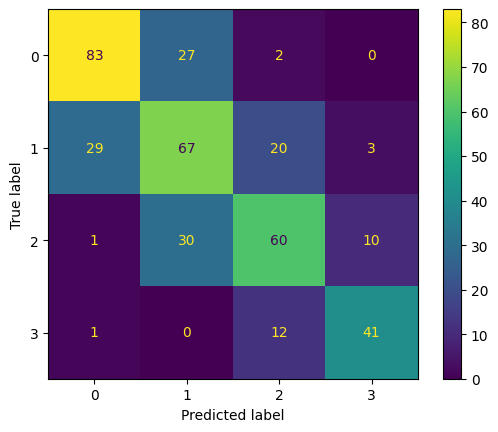

In [ ]:
# calculate the values in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# create the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# display the confusion matrix
disp.plot()

plt.show()

Classified correctly 251

In [ ]:
# Create classification report
target_names = ['cat_0', 'cat_1', 'cat_2', 'cat_3']
lg_report = classification_report(y_test, y_pred, target_names=target_names)
print(lg_report)

              precision    recall  f1-score   support

       cat_0       0.73      0.74      0.73       112
       cat_1       0.54      0.56      0.55       119
       cat_2       0.64      0.59      0.62       101
       cat_3       0.76      0.76      0.76        54

    accuracy                           0.65       386
   macro avg       0.67      0.66      0.67       386
weighted avg       0.65      0.65      0.65       386



### Support Vector Machine (SVM)

- Just like Logistic regression, SVM is also sensitive to outliers and the same splitting of data (Trainset, Testset) is used.

Construct SVM, fit trainig data and get predictions.

A confusion matrix to visualize the results of the logistic regression model. 

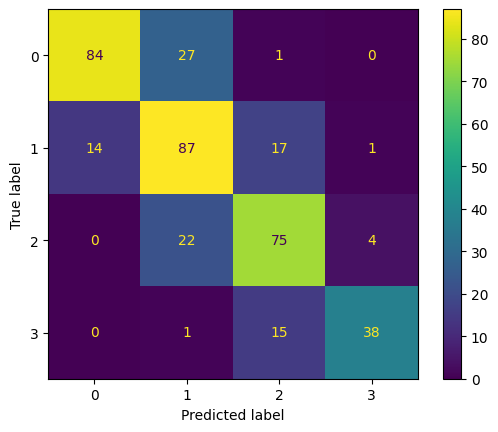

In [ ]:
# construct the logistic model
svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=random_state)

# fit the training data
svm_clf.fit(X_train, y_train)

# get predictions on the test set
y_pred = svm_clf.predict(X_test)

# calculate the values in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=svm_clf.classes_)

# create the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# display the confusion matrix
disp.plot()

plt.show()

In [ ]:
# Create classification report
target_names = ['cat_0', 'cat_1', 'cat_2', 'cat_3']
svm_report = classification_report(y_test, y_pred, target_names=target_names)
print(svm_report)

              precision    recall  f1-score   support

       cat_0       0.86      0.75      0.80       112
       cat_1       0.64      0.73      0.68       119
       cat_2       0.69      0.74      0.72       101
       cat_3       0.88      0.70      0.78        54

    accuracy                           0.74       386
   macro avg       0.77      0.73      0.75       386
weighted avg       0.75      0.74      0.74       386



### Construct Tree-Based Model
- Desicion Tree
- Random Forest
- XGBoost

Select the target variable **CATEGORY** `y` and predictor variables `X`.

In [ ]:
# set target variable
y = df1['CATEGORY']

# X predictor variables
X = df1.copy()
X = X.drop(columns='CATEGORY')

X.shape

(2000, 21)

Split the data into training, validating, and testing sets.

In [ ]:
# creating test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

# creating validation data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=random_state)

### **01 - Decision Tree**

- Tuning DecisionTreeClassifier using GridSearchCV

What really matters here is an overall good performance across all classes, but also, high precision and recall for Category 0, especially recall (so that customers who should be in Category 0, are not missed).

In [ ]:
# instantiate decision tree model
dt_clf = DecisionTreeClassifier(random_state=random_state)

# hyperparameters to tune
cv_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}

# focused recall on customers of category 0
recall_0 = make_scorer(recall_score, average=None, labels=[0], greater_is_better=True)

# scoring metrics
scoring = {
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'accuracy':'accuracy',
    'recall_0': recall_0
}

# GridSearchCV object
dt_cv = GridSearchCV(dt_clf, cv_params, scoring=scoring, cv=4, refit='recall_0', n_jobs=-1, verbose=2)

# fit the model to the training data.
dt_cv.fit(X_tr, y_tr)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10]},
             refit='recall_0',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_0': make_scorer(recall_score, response_method='predict', average=None, labels=[0]),
                      'recall_macro': 'recall_macro'},
             verbose=2)

In [ ]:
print ('Best parameters: ',dt_cv.best_params_)
print('Best score: ', dt_cv.best_score_)

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score:  0.8651685393258427


The Decision Tree correctly identifies 86.5% of the actual Category 0 customers.

A function that will help to extract all the scores from the grid search. 

In [ ]:
def make_results(model_name: str, model_object, metric: str):
    '''  
    Returns a pandas DataFrame with the metric scores for the best model 
    (based on the highest value of the specified metric).
    '''

    # map common keys
    metric_dict = {
        'precision': 'mean_test_precision_macro',
        'recall': 'mean_test_recall_macro',
        'f1': 'mean_test_f1_macro',
        'accuracy': 'mean_test_accuracy',
        'recall_0': 'mean_test_recall_0'
    }

    # convert to actual column name
    selected_metric = metric_dict.get(metric, metric)

    # get CV results
    cv_results = pd.DataFrame(model_object.cv_results_)

    # get the row with the best score for the selected metric
    best_row = cv_results.iloc[cv_results[selected_metric].idxmax(), :]

    # extract metrics
    data = {
        'Model': model_name,
        'Recall Category 0': best_row.get('mean_test_recall_0', None),
        'Recall (Macro)': best_row.get('mean_test_recall_macro', None),
        'Precision (Macro)': best_row.get('mean_test_precision_macro', None),
        'F1 (Macro)': best_row.get('mean_test_f1_macro', None),
        'Accuracy': best_row.get('mean_test_accuracy', None)
    }

    return pd.DataFrame([data])


Use the function to get all the scores from grid search.

In [ ]:
# Get all scores
dt_cv_results = make_results('decision tree cv', dt_cv, 'recall_0')
dt_cv_results

,Model,Recall Category 0,Recall (Macro),Precision (Macro),F1 (Macro),Accuracy
0,decision tree cv,0.865169,0.749816,0.761762,0.753427,0.755833


A Balance between precision and recall across all ctegories - F1 (Macro) at 75%

75% Accuracy is decent, but since the focus is on Category 0, accuracy isn’t the projects key metric.

### **02 - Random Forest**

In [ ]:
# instantiate RF model
rf_clf = RandomForestClassifier(random_state=42)

# hyperparameters to tune
cv_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [None, 'balanced']
}

# scoring metrics
scoring = {
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'accuracy':'accuracy',
    'recall_0': recall_0
}

# GridSearchCV object
rf_cv = GridSearchCV(rf_clf, cv_params, scoring=scoring, cv=4, refit='recall_0', n_jobs=-1, verbose=2)

# fit the model to the training data.
rf_cv.fit(X_tr, y_tr)


Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             refit='recall_0',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_0': make_scorer(recall_score, response_method='predict', average=None, labels=[0]),
                      'recall_macro': 'recall_macro'},
             verbose=2)

To save time, in fitting the model, the Random Forest model is saved as pickle under this name `'rf_cv.pickle`

In [ ]:
# Save the model to pickle
with open('rf_cv.pickle', 'wb') as write_pickle:
    pickle.dump(rf_cv, write_pickle)


Check best params and the best Recall_0 score on CV.

In [ ]:
print ('Best parameters: ',rf_cv.best_params_)

print('Best score: ', rf_cv.best_score_)

Best parameters:  {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.9185393258426967


The Random Forest model with a best_score of 0.92, is a little but higher than that of the Decision Tree (~0.87)

Get all score of Random Forest and the Classification Tree

In [ ]:
# Get all scores
rf_cv_results = make_results('random forest cv', rf_cv, 'recall_0')
print(dt_cv_results)
print(rf_cv_results)

              Model  Recall Category 0  Recall (Macro)  Precision (Macro)  \
0  decision tree cv           0.865169        0.749816           0.761762   

   F1 (Macro)  Accuracy  
0    0.753427  0.755833  
              Model  Recall Category 0  Recall (Macro)  Precision (Macro)  \
0  random forest cv           0.918539        0.781041           0.801787   

   F1 (Macro)  Accuracy  
0    0.788068  0.794167  


The **Random Forest** model outclassed the Decision Tree in each of the metrics (Recall, Precision, F1 and Accuracy)

### **03 - XGBoost**

In [ ]:
# Instantiate xgboost model
xgb_clf = XGBClassifier(random_state=random_state, objective='multi:softmax', num_class=4)

# hyperparameters to tune
cv_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'class_weight': [None, 'balanced']
}

# scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'recall_0': recall_0
}

# GridSearchCV object
xgb_cv = GridSearchCV(xgb_clf, cv_params, scoring=scoring, cv=4, refit='recall_0', n_jobs=-1, verbose=2)

# fit the model to the training data.
xgb_cv.fit(X_tr, y_tr)

Fitting 4 folds for each of 972 candidates, totalling 3888 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200],
                         'subsample': [0.7, 0.8, 1.0]},
             refit='recall_0',
             scoring={'accuracy': 'accuracy', 'f1_macro': 'f1_macro',
                      'precision_macro': 'precision_macro',
                      'recall_0': make_scorer(recall_score, response_method='predict', average=None, labels=[0]),
                      'recall_macro': 'recall_macro'},
             verbose=2)

To save time, in fitting the model, the XGBoost model is saved as pickle under this name `xgb_cv.pickle`

In [ ]:
# save the model to pickle
with open('xbg_cv.pickle', 'wb') as write_pickle:
    pickle.dump(xgb_cv, write_pickle)

Check best params and the best Recall_0 score on CV.

In [ ]:
print ('Best parameters: ',xgb_cv.best_params_)
print('Best score: ', xgb_cv.best_score_)

Best parameters:  {'class_weight': None, 'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best score:  0.9466292134831461


Get all score of XGBoost and also for RandomForest and ClassificationTree

In [ ]:
# get all scores
xgb_cv_results = make_results('xgboost cv', xgb_cv, 'recall_0')
print(dt_cv_results)
print(rf_cv_results)
print(xgb_cv_results)

              Model  Recall Category 0  Recall (Macro)  Precision (Macro)  \
0  decision tree cv           0.865169        0.749816           0.761762   

   F1 (Macro)  Accuracy  
0    0.753427  0.755833  
              Model  Recall Category 0  Recall (Macro)  Precision (Macro)  \
0  random forest cv           0.918539        0.781041           0.801787   

   F1 (Macro)  Accuracy  
0    0.788068  0.794167  
        Model  Recall Category 0  Recall (Macro)  Precision (Macro)  \
0  xgboost cv           0.946629        0.682373           0.691879   

   F1 (Macro)  Accuracy  
0    0.671741    0.6775  


The **XGBoost** has the highest Recall for Category 0 of the 3 tree based models which is good, but on all other metrics, it comes last.


### Evaluate on validation set.

A function that gets all the scores from a model's predictions.

In [ ]:

def get_scores(model_name: str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores for a multiclass classification model.
    Returns:
        pd.DataFrame: A table with metrics including macro-averaged scores and recall for Category 0
    '''

    preds = model.best_estimator_.predict(X_test_data)

    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds, average='macro'), 3)
    recall_macro = round(recall_score(y_test_data, preds, average='macro'), 3)
    f1 = round(f1_score(y_test_data, preds, average='macro'), 3)

    # focused recall for Category 0
    recall_per_class = recall_score(y_test_data, preds, average=None, labels=[0, 1, 2, 3])
    recall_cat_0 = round(recall_per_class[0], 3)

    # compile results into a DataFrame
    table = pd.DataFrame({
        'Model': [model_name],
        'Recall Category 0': [recall_cat_0],
        'Recall (Macro)': [recall_macro],
        'Precision (Macro)': [precision],
        'F1 (Macro)': [f1],
        'Accuracy': [accuracy]
    })

    return table


Getting scores for the decision tree model, the random forest model and the XGBoost model on the validation set.

In [ ]:
# validation results for all 3 models
dt_val_results = get_scores('decision tree validation', dt_cv, X_val, y_val)
rf_val_results = get_scores('random forest validation', rf_cv, X_val, y_val)
xgb_val_results = get_scores('xgboost validation', xgb_cv, X_val, y_val)

# join the results into a table
val_results = [dt_val_results, rf_val_results, xgb_val_results]
val_results = pd.concat(val_results)
val_results.reset_index(drop=True)

,Model,Recall Category 0,Recall (Macro),Precision (Macro),F1 (Macro),Accuracy
0,decision tree validation,0.899,0.779,0.793,0.785,0.790
1,random forest validation,0.891,0.802,0.815,0.806,0.812
2,xgboost validation,0.916,0.645,0.658,0.643,0.657


Since Recall for Category 0 is the key metric (due to business concern about contacting customers who don’t want to be called):

- XGBoost wins for Category 0 Recall (0.916), but it compromises heavily on overall model performance (accuracy, precision, F1).

- Decision Tree gives a good balance: high Category 0 Recall (0.899) with better general performance than XGBoost.

- Random Forest is the best all-rounder but slightly lags in Category 0 recall (0.81).

Although XGBoost achieved a higher recall for Category 0, Random Forest was chosen due to better overall performance on unseen data, faster training, and less susceptibility to overfitting in this context. Future iterations could involve hyperparameter tuning or ensemble stacking.

Using the Random Forest model to predict on the testset.

In [ ]:
rf_test_score = get_scores('Random Forest model', rf_cv, X_test, y_test)
rf_test_score

,Model,Recall Category 0,Recall (Macro),Precision (Macro),F1 (Macro),Accuracy
0,Random Forest model,0.908,0.828,0.837,0.832,0.825


The final model seems to be a well-performing one.

A confusion matrix to visualize the results of the Random Forest model. 

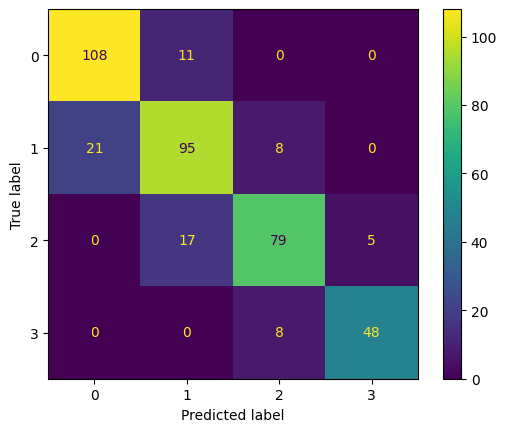

In [ ]:
y_pred = rf_cv.best_estimator_.predict(X_test)

# calculate the values in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf_cv.classes_)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();


Summary of the Confusion Matrix:
- **Correctly classified**	330
- Misclassifications	70
- Total Predictions	400

Since the Global Head of Sales is especially sensitive to misclassifying Category 0:
- True Positives (Correctly classified as 0): 108

- False Negatives (Misclassified as not 0): 11 - These are customers who did not want to be called but were potentially misclassified and may get called. But they were actually classified as Category 1 (Low priority to call client again.)

### **Feature importance**

Inspect the top 10 most important features of the final model.

In [ ]:
# get feature importances from the best estimator
importances = rf_cv.best_estimator_.feature_importances_

# feature names
feature_names = X_train.columns

# create a DataFrame
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# sort and select top 10
top_10 = feature_importance_df.sort_values(by='importance', ascending=False).head(10)
top_10.reset_index(drop=True)

,feature,importance
0,FEAT_11,0.194101
1,FEAT_8,0.101114
2,FEAT_6,0.081669
3,FEAT_0,0.079365
4,FEAT_4,0.073420
5,FEAT_2_2,0.053205
6,FEAT_16,0.052784
7,FEAT_7,0.050312
8,FEAT_17,0.048918
9,FEAT_10,0.044026


Visualize top 10 most important features of the final model.

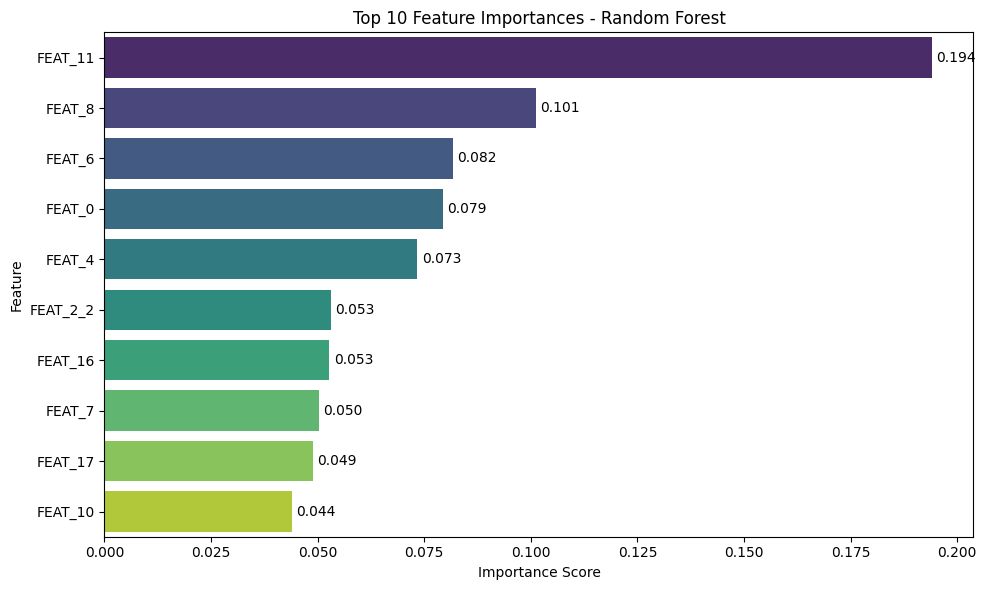

In [ ]:
# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='importance', y='feature', hue='feature', dodge=False,palette='viridis')

# annotate of importance score
for i, value in enumerate(top_10['importance']):
    plt.text(value + 0.001, i, f"{value:.3f}", va='center')

plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

- `FEAT_11` is by far the most influential feature, contributing to over 19% to the model's decisions.
- `FEAT_8`, `FEAT_6`, `FEAT_0` and `FEAT_4` have the highest importance, in that order.

These variables are most helpful in predicting the outcome variable, `CATEGORY`.

#### **Lowest possible number of Features to maintain a minimum 70% classification accuracy**

In [ ]:

accuracies = []
min_features_required = None

# loop through feature counts from 1 to total
for i in range(1, len(feature_importance_df) + 1):
    top_features = feature_importance_df['feature'].iloc[:i].tolist()
    X_subset = X_tr[top_features]

    # use best RF model but retrain on subset of features
    model = rf_cv.best_estimator_

    # 4-fold CV on the subset
    scores = cross_val_score(model, X_subset, y_tr, cv=4, scoring='accuracy')
    mean_score = scores.mean()
    accuracies.append(mean_score)

    if mean_score >= 0.70:
        min_features_required = i
        print(f"Minimum features needed: {i}")
        print(f"Accuracy achieved: {mean_score:.4f}")
        break

if min_features_required is None:
    print("No feature subset reached 70% accuracy.")


Minimum features needed: 18
Accuracy achieved: 0.7875


In [ ]:
# get those 15 features
feature_importance_df.sort_values(by='importance', ascending=False).head(18).reset_index(drop=True)

,feature,importance
0,FEAT_11,0.194101
1,FEAT_8,0.101114
2,FEAT_6,0.081669
3,FEAT_0,0.079365
4,FEAT_4,0.073420
5,FEAT_2_2,0.053205
6,FEAT_16,0.052784
7,FEAT_7,0.050312
8,FEAT_17,0.048918
9,FEAT_10,0.044026


----

![PACE - Execute Stage](img/pace_execute.png)
- Interpret model performance and results
- Share actionable steps with the Global Head of Sales

### Results of the models

**Logistic Regression and SVM**

The Support Vector Machine outperformed the logistic regression model achieved **weighted avg** of precision of 75%, recall of 74%, f1-score of 74% on the test set.

**Tree-based Models**

The random forest model slightly outperformed the decision tree and the xgboost model achieving a Recall on Category 0 of 90.8%, recall of 82.8%, precision of 83.7%, f1-score of 83.2%, and accuracy of 82.5%, on the test set.

### Conclusion, Recommendations, Next Steps

In conclusion, the data-driven analysis has provided valuable insights into the factors influencing customer interest for Hyper Artificial Intelligence Fund. The Random Forest model, outperforming other models, has identified critical predictors such as FEAT_11, FEAT_8, FEAT_6, FEAT_0 and FEAT_4. Understanding these factors help to prioritize follow-ups and avoid contacting uninterested customers. 18 features are the minimum required to achieve an accuracy of not less than 70%.


The following are Key Insights from the Data Analysis:
- Missing Data: All null values were in FEAT_9 (184 rows). These were imputed using the mean and rounded to preserve consistency in data type.
- Customers Category 3 had significantly fewer customers than other classes, increasing the risk of bias.
- Job Role Skew: Customers with JOB_A were overrepresented — making up to almost sum of the volume of those with JOB_B, JOB_C, and JOB_D together.

**Recommendations**
- Implement the Random Forest into the sales call workflow to provide real-time guidance to sales personnel and continuously check on its performance.
- Continue collecting features that showed high predictive value (FEAT_11, FEAT_8, FEAT_0, FEAT_4, FEAT_6).

**Next Steps**

Validate model performance on the withheld 1000-customer dataset to ensure generalizability and confirm Category 0 recall rates remain high.

Explore clustering to uncover natural customer groups that may not align perfectly with the defined categories but could benefit marketing strategy.

Explore opportunities for refining the model, incorporating additional data sources, and enhancing its predictive power.


----